In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 2D data

In [0]:
np.random.seed(seed = 2)
X = np.random.multivariate_normal([0,0], [[10, 3], [3, 1]], 500)

In [47]:
X.shape

(500, 2)

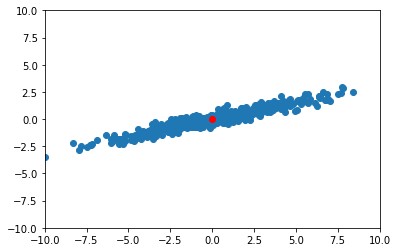

In [50]:
plt.plot(X[:,0], X[:,1], 'o')
plt.xlim(-10,10)
plt.ylim(-10,10)

plt.plot(*[0,0], 'ro')

In [0]:
u, sv, vt = np.linalg.svd(X)
v = vt.T

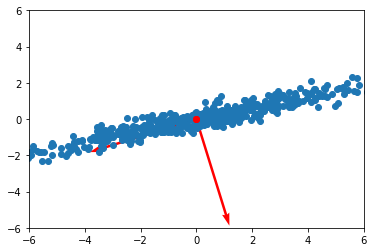

In [53]:
plt.plot(X[:,0], X[:,1], 'o')
plt.ylim(-6,6)
plt.xlim(-6,6)

origin = 2 * [[0, 0]]

plt.plot(*origin, 'ro')
plt.quiver(*origin, v[0,:], v[1, :], scale = 3., color = 'r')


In [44]:
v

array([[ 0.99968298, -0.02517814],
       [-0.02517814, -0.99968298]])

(-6.0, 6.0)

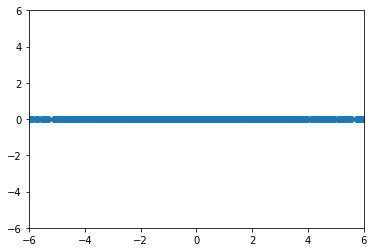

In [20]:
# Projection onto first principal component
X_reduced = np.matmul(X, v[:,0])

plt.plot(X_reduced, np.zeros(500), 'o')
plt.ylim(-6,6)
plt.xlim(-6,6)


(-6.0, 6.0)

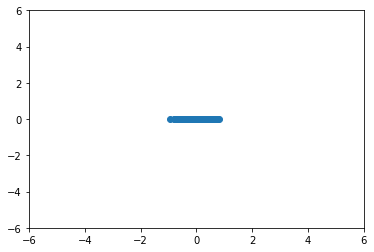

In [21]:
# Projection onto the second principal component
X_reduced = np.matmul(X, v[:,1])

plt.plot(X_reduced, np.zeros(500), 'o')
plt.ylim(-6,6)
plt.xlim(-6,6)


In [0]:
def pca(X, n_components):

    u, sv, vt = np.linalg.svd(X)
    v = vt.T

    return v[:,:n_components]

# 3D data

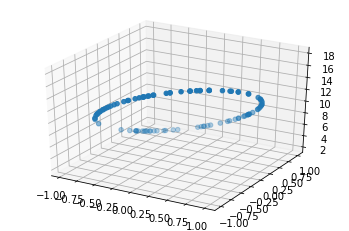

In [23]:
x = np.random.uniform(-1,1, 100)
y = np.r_[np.sqrt(1-x[:50]**2), -1*np.sqrt(1-x[50:]**2)]
z = 5*x-6*y + 10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

In [0]:
X = np.c_[x,y,z]
X_bar = np.mean(X, axis = 0)
X = X - X_bar

In [0]:
v = pca(X, 2)

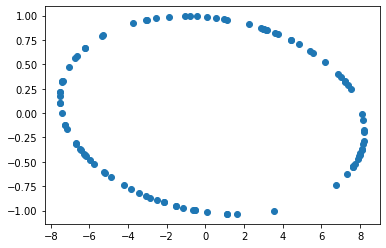

In [26]:
X_reduced = np.matmul(X, v)

plt.scatter(X_reduced[:,0], X_reduced[:,1])

In [27]:
v

array([[-0.0647971 ,  0.76978928],
       [ 0.11128145,  0.637943  ],
       [-0.99167423,  0.02128835]])

# sklearn

Sklearn is a machine learning library that contains most of the classical machine learning algorithms including PCA. 

In [28]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
pca.singular_values_

array([5.64617552e+01, 6.85152120e+00, 1.68588636e-15])

In [30]:
p = pca.components_
p

array([[-0.0647971 ,  0.11128145, -0.99167423],
       [-0.76978928, -0.637943  , -0.02128835],
       [ 0.63500064, -0.76200076, -0.12700013]])

In [31]:
# First two principal components we found above. 
v

array([[-0.0647971 ,  0.76978928],
       [ 0.11128145,  0.637943  ],
       [-0.99167423,  0.02128835]])

# Dimensionality Reduction

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [33]:
# Load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale the data
x_train = x_train/255.
# Flatten images into vectors
x_train = x_train.reshape(-1,784)

11493376/11490434 [==============================] - 0s 0us/step


In [34]:
x_train.shape

(60000, 784)

In [35]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256, activation = 'relu', input_shape = (784,)))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

model.fit(x_train, y_train , epochs = 5, verbose = 1)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6307 - accuracy: 0.8429
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3299 - accuracy: 0.9091
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2820 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2523 - accuracy: 0.9301
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2298 - accuracy: 0.9360


Apply PCA to reduce the feature dimension to 50 by projecting into the subspace determined by the first 50 principal components. And train the algorithm again with these 50 dimensional reduced dataset. 

In [0]:
pca = PCA(n_components=50)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
x_train_reduced = pca.transform(x_train)

In [0]:
x_train_reduced.shape

(60000, 50)

Let's train the same model from scratch but this time with reduced data set with 50 features. 

In [0]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256, activation = 'relu', input_shape = (50,)))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

model.fit(x_train_reduced, y_train , epochs = 5, verbose = 1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.6358 - accuracy: 0.8407
Epoch 2/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3090 - accuracy: 0.9139
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2530 - accuracy: 0.9281
Epoch 4/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2212 - accuracy: 0.9368
Epoch 5/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1989 - accuracy: 0.9434


The model achieves a similar accuracy using only 50 features. 

# Autoencoder as PCA

An autoencoder with linear activations will learn the same principal subspace as the PCA

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

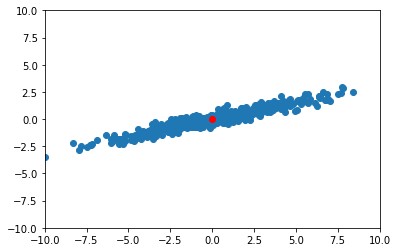

In [0]:
np.random.seed(seed = 2)
X = np.random.multivariate_normal([0,0], [[10, 3], [3, 1]], 500)

plt.plot(X[:,0], X[:,1], 'o')
plt.xlim(-10,10)
plt.ylim(-10,10)

plt.plot(*[0,0], 'ro')

In [0]:
u, sv, vt = np.linalg.svd(X)
v = vt.T

In [0]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation = 'linear', input_shape = (2,), use_bias= False))
model.add(tf.keras.layers.Dense(2, activation = 'linear', use_bias=False))


model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.2),
              loss = tf.keras.losses.MeanSquaredError())

model.fit(X, X, epochs = 100, verbose = 1)

Train on 500 samples
Epoch 1/100
500/500 [==============================] - 0s 725us/sample - loss: 0.7844
Epoch 2/100
500/500 [==============================] - 0s 96us/sample - loss: 0.1796
Epoch 3/100
500/500 [==============================] - 0s 95us/sample - loss: 0.0681
Epoch 4/100
500/500 [==============================] - 0s 91us/sample - loss: 0.0491
Epoch 5/100
500/500 [==============================] - 0s 96us/sample - loss: 0.0485
Epoch 6/100
500/500 [==============================] - 0s 95us/sample - loss: 0.0497
Epoch 7/100
500/500 [==============================] - 0s 95us/sample - loss: 0.0494
Epoch 8/100
500/500 [==============================] - 0s 124us/sample - loss: 0.0479
Epoch 9/100
500/500 [==============================] - 0s 97us/sample - loss: 0.0497
Epoch 10/100
500/500 [==============================] - 0s 90us/sample - loss: 0.0506
Epoch 11/100
500/500 [==============================] - 0s 89us/sample - loss: 0.0531
Epoch 12/100
500/500 [==================

In [0]:
model.layers[0].get_weights()

[array([[-0.5777805 ],
        [-0.17388703]], dtype=float32)]

In [0]:
model.layers[1].get_weights()

[array([[-1.5845668 , -0.39997184]], dtype=float32)]

In [0]:
v_ae = model.layers[0].get_weights()[0]

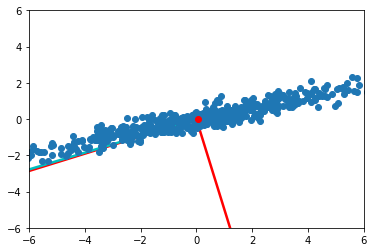

In [0]:
plt.plot(X[:,0], X[:,1], 'o')
plt.ylim(-6,6)
plt.xlim(-6,6)


X_bar = np.mean(X, axis = 0)
plt.plot(X_bar[0], X_bar[1], 'ro')

origin = 2* [[0, 0]]

plt.quiver(*origin, v[0,:], v[1, :], scale = 1., color = 'r')
plt.quiver(*origin, v_ae[0,0], v_ae[1, 0], scale = 1., color = 'c')

## Data Compression

In [0]:
from sklearn.decomposition import PCA

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.
x_train = x_train.reshape(-1,784)

pca = PCA(n_components = 50)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
x_train_reduced = pca.transform(x_train)

In [0]:
pca.components_.shape

(50, 784)

In [0]:
x_train_reduced.shape

(60000, 50)

In [0]:
x_train_recovered = pca.inverse_transform(x_train_reduced)

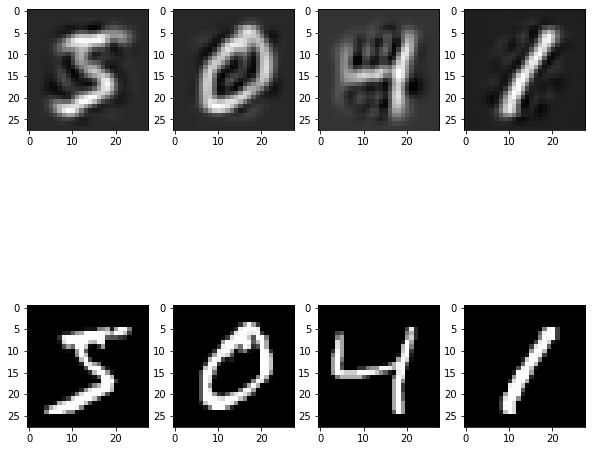

In [0]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train_recovered[i].reshape(28,28)*255, cmap=plt.cm.gray)

for i in range(4):
    plt.subplot(2,4,i+5)
    plt.imshow(x_train[i].reshape(28,28)*255, cmap=plt.cm.gray)

# Visualization

In [0]:
# Load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale the data
x_train = x_train/255.
# Flatten images into vectors
x_train = x_train.reshape(-1,784)

In [0]:
pca = PCA(n_components=3)
pca.fit(x_train[:500])
x_train_reduced_3d = pca.transform(x_train[:500])

In [0]:
x_train_reduced_3d.shape

(500, 3)

In [0]:
xs = x_train_reduced_3d[:,0]
ys = x_train_reduced_3d[:,1]
zs = x_train_reduced_3d[:,2]

text_labels = [str(d) for d in y_train[:500]]

In [0]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=xs,
    y=ys,
    z=zs,
    mode='markers+text',
    marker=dict(
        size=8,
        color=y_train[:500],               
        colorscale='Rainbow',  
        opacity=0.8
    ),
    text = text_labels
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
